# Polynomial Regression - Salary Data

### Preprocessing

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [2]:
df = pd.read_csv('./data/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
df = df.drop('Position', axis=1)
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


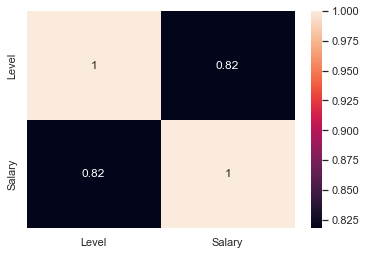

In [6]:
sns.heatmap(df.corr(), annot=True)
plt.show()

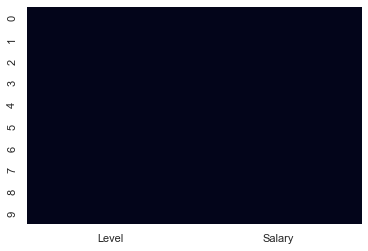

In [7]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

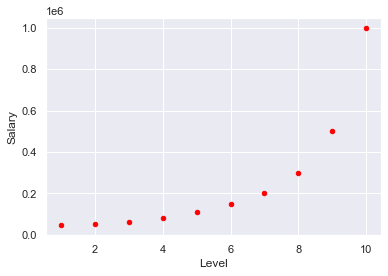

In [8]:
df.plot.scatter('Level', 'Salary', color='red')
plt.show()

In [9]:
X_train = df.drop('Salary', axis=1)
y_train = df['Salary']

### Modelling

#### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.coef_, model.intercept_

(array([80878.78787879]), -195333.33333333337)

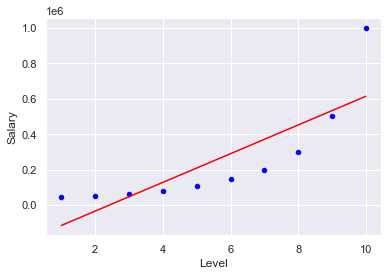

In [12]:
df.plot.scatter('Level', 'Salary', color='blue')
plt.plot(
    np.array(df['Level']),
    model.coef_[0] * np.array(df['Level']) + model.intercept_,
    color='red'
)
plt.show()

#### Polynomial Regression

##### Degree 2

In [13]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)
X_deg2 = quadratic.fit_transform(X_train)
X_deg2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [14]:
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y_train)

LinearRegression()

In [15]:
model_deg2.coef_, model_deg2.intercept_

(array([      0.        , -132871.21212121,   19431.81818182]),
 232166.6666666664)

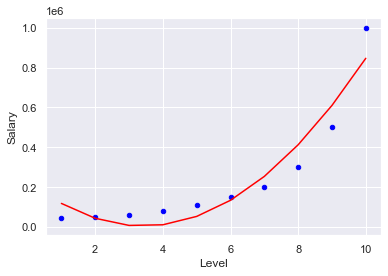

In [16]:
df.plot.scatter('Level', 'Salary', color='blue')
plt.plot(
    np.array(df['Level']),
    model_deg2.coef_[1] * np.array(df['Level']) 
        + model_deg2.coef_[2] * np.array(df['Level']) ** 2
        + model_deg2.intercept_,
    color='red'
)
plt.show()

##### Degree 3

In [17]:
cubic = PolynomialFeatures(degree=3)
X_deg3 = cubic.fit_transform(X_train)
X_deg3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [18]:
model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y_train)

LinearRegression()

In [19]:
model_deg3.coef_, model_deg3.intercept_

(array([     0.        , 180664.33566432, -48548.95104895,   4120.04662005]),
 -121333.33333330904)

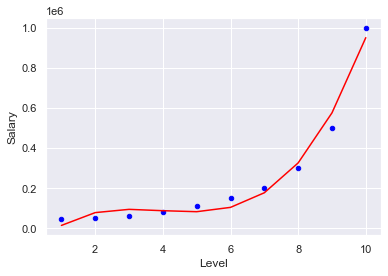

In [20]:
df.plot.scatter('Level', 'Salary', color='blue')
plt.plot(
    np.array(df['Level']),
    model_deg3.coef_[1] * np.array(df['Level']) 
        + model_deg3.coef_[2] * np.array(df['Level']) ** 2
        + model_deg3.coef_[3] * np.array(df['Level']) ** 3
        + model_deg3.intercept_,
    color='red'
)
plt.show()

##### Degree 3

In [21]:
quartic = PolynomialFeatures(degree=4)
X_deg4 = quartic.fit_transform(X_train)
X_deg4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [22]:
model_deg4 = LinearRegression()
model_deg4.fit(X_deg4, y_train)

LinearRegression()

In [23]:
model_deg4.coef_, model_deg4.intercept_

(array([      0.        , -211002.33100293,   94765.44289063,
         -15463.28671331,     890.15151515]),
 184166.66666727886)

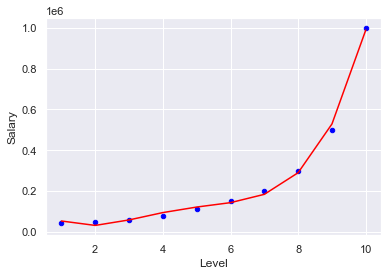

In [24]:
df.plot.scatter('Level', 'Salary', color='blue')
plt.plot(
    np.array(df['Level']),
    model_deg4.coef_[1] * np.array(df['Level']) 
        + model_deg4.coef_[2] * np.array(df['Level']) ** 2
        + model_deg4.coef_[3] * np.array(df['Level']) ** 3
        + model_deg4.coef_[4] * np.array(df['Level']) ** 4
        + model_deg4.intercept_,
    color='red'
)
plt.show()